Лаб 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, uniform

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# ================== Задание №1 ==================
print("Задание №1")
λ1 = 0.1  # интенсивность (заявок/мс)
T = 100   # интервал времени (мс)
experiments = 10

arrival_counts = []
all_interarrivals = []

for _ in range(experiments):
    interarrivals = []
    t = 0
    while True:
        u = np.random.rand()
        dt = - (1/λ1) * np.log(u)   # интервал между заявками
        if t + dt > T:
            break
        t += dt
        interarrivals.append(dt)
    arrival_counts.append(len(interarrivals))
    all_interarrivals.extend(interarrivals)

avg_count = np.mean(arrival_counts)
avg_inter = np.mean(all_interarrivals)
print(f"Среднее число заявок за {T} мс: {avg_count:.2f} (теоретическое {λ1*T})")
print(f"Средний интервал между заявками: {avg_inter:.2f} мс (теоретическое {1/λ1})")
print()






Задание №1
Среднее число заявок за 100 мс: 9.70 (теоретическое 10.0)
Средний интервал между заявками: 9.81 мс (теоретическое 10.0)



Задание №2


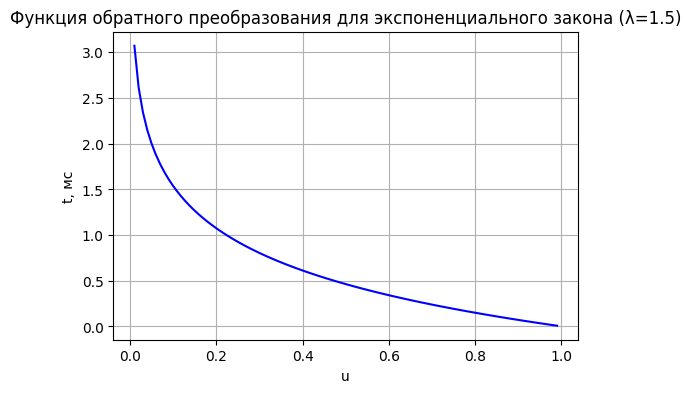

Сгенерировано 1000 чисел
Сгенерировано 10000 чисел
Сгенерировано 100000 чисел
Сгенерировано 1000000 чисел


In [3]:

# ================== Задание №2 ==================
print("Задание №2")
λ2 = 1.5  # интенсивность
u_vals = np.linspace(0.01, 0.99, 100)  # избегаем 0 и 1 для логарифма
t_vals = - (1/λ2) * np.log(u_vals)

plt.figure(figsize=(6,4))
plt.plot(u_vals, t_vals, 'b-')
plt.xlabel('u')
plt.ylabel('t, мс')
plt.title('Функция обратного преобразования для экспоненциального закона (λ=1.5)')
plt.grid(True)
plt.savefig('task2_inverse.png')
plt.show()

# Моделирование для разных N
N_vals = [10**3, 10**4, 10**5, 10**6]
for N in N_vals:
    u = np.random.rand(N)
    t = - (1/λ2) * np.log(u)
    # можно сохранить для задания 3, но здесь просто покажем
    print(f"Сгенерировано {N} чисел")

In [4]:
# ================== Задание №3 ==================
print("\nЗадание №3")
bins_hist = 100
# Определим диапазон для гистограммы (от 0 до 5, т.к. основная масса при λ=1.5)
t_max = 5
for N in N_vals:
    u = np.random.rand(N)
    t = - (1/λ2) * np.log(u)
    # Гистограмма относительных частот (плотность)
    counts, bin_edges = np.histogram(t, bins=bins_hist, range=(0, t_max), density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    # Теоретическая плотность
    pdf_theor = λ2 * np.exp(-λ2 * bin_centers)
    # Среднеквадратическое отклонение
    rmse = np.sqrt(np.mean((counts - pdf_theor)**2))
    print(f"N = {N:6d}, RMSE = {rmse:.6f}")


Задание №3
N =   1000, RMSE = 0.058437
N =  10000, RMSE = 0.016158
N = 100000, RMSE = 0.006341
N = 1000000, RMSE = 0.001735



Задание №4
Площадь под гистограммой процесса 1: 1.0000
Площадь под гистограммой процесса 2: 1.0000


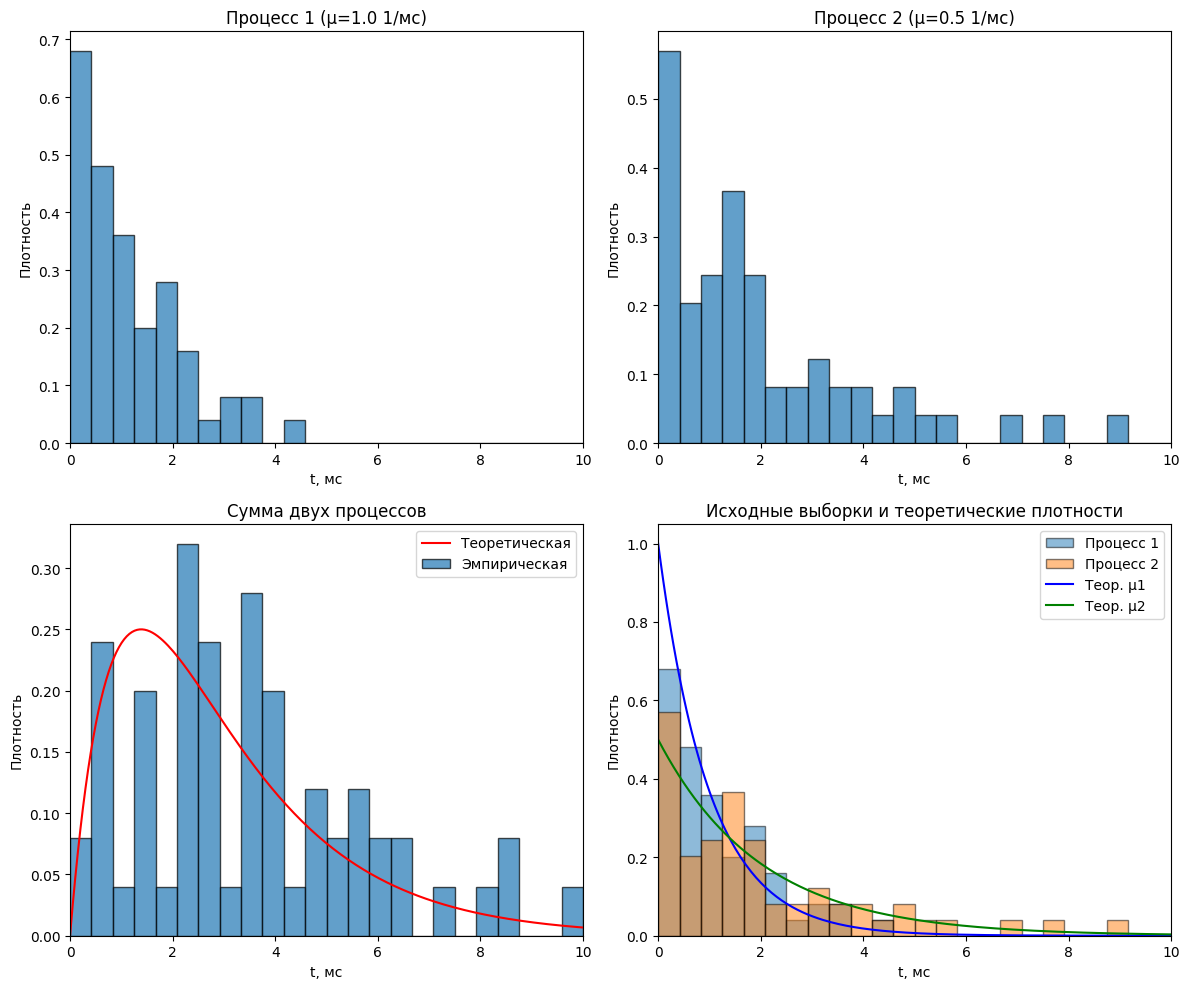

Задание 4 выполнено. Графики сохранены.


In [5]:
# ================== Задание №4 ==================
print("\nЗадание №4")
μ1 = 1.0
μ2 = 0.5
n_samples = 60
bins = 24
x_range = (0, 10)

# Генерируем выборки из экспоненциального распределения
data1 = np.random.exponential(scale=1/μ1, size=n_samples)
data2 = np.random.exponential(scale=1/μ2, size=n_samples)

# Построение гистограмм плотности на интервале [0,10]
hist1, bin_edges1 = np.histogram(data1, bins=bins, range=x_range, density=True)
hist2, bin_edges2 = np.histogram(data2, bins=bins, range=x_range, density=True)
bin_width = bin_edges1[1] - bin_edges1[0]  # одинаков для обеих

# Проверка площади под гистограммой (должна быть близка к 1)
area1 = np.sum(hist1) * bin_width
area2 = np.sum(hist2) * bin_width
print(f"Площадь под гистограммой процесса 1: {area1:.4f}")
print(f"Площадь под гистограммой процесса 2: {area2:.4f}")

# Построение интегральных вероятностей (накопленные суммы)
prob1 = hist1 * bin_width   # вероятности в каждом столбце
prob2 = hist2 * bin_width
cum1 = np.concatenate(([0], np.cumsum(prob1)))  # границы от 0 до 1
cum2 = np.concatenate(([0], np.cumsum(prob2)))
# Границы интервалов по времени
time_bins1 = bin_edges1
time_bins2 = bin_edges2

# Функция для получения случайного времени по номеру интервала и равномерному числу
def sample_from_hist(u, cum_probs, time_bins):
    # Находим индекс интервала
    idx = np.searchsorted(cum_probs, u, side='right') - 1
    if idx < 0:
        idx = 0
    # Линейная интерполяция внутри интервала
    left_time = time_bins[idx]
    right_time = time_bins[idx+1]
    left_prob = cum_probs[idx]
    right_prob = cum_probs[idx+1]
    if right_prob > left_prob:
        # пропорция внутри интервала
        frac = (u - left_prob) / (right_prob - left_prob)
        return left_time + frac * (right_time - left_time)
    else:
        # вырожденный случай (нулевая вероятность) – возвращаем левую границу
        return left_time

# Генерируем 60 сумм
m = 60
sums = []
for _ in range(m):
    u1 = np.random.rand()
    u2 = np.random.rand()
    t1 = sample_from_hist(u1, cum1, time_bins1)
    t2 = sample_from_hist(u2, cum2, time_bins2)
    sums.append(t1 + t2)

# Гистограмма для сумм
hist_sum, bin_edges_sum = np.histogram(sums, bins=bins, range=x_range, density=True)
bin_centers_sum = (bin_edges_sum[:-1] + bin_edges_sum[1:]) / 2

# Теоретическая плотность для суммы двух экспонент (гипоэкспоненциальное распределение)
# При μ1 ≠ μ2: f(t) = (μ1 μ2)/(μ1-μ2) (e^{-μ2 t} - e^{-μ1 t})
t_theor = np.linspace(0, 10, 200)
if μ1 != μ2:
    pdf_sum_theor = (μ1 * μ2) / (μ1 - μ2) * (np.exp(-μ2 * t_theor) - np.exp(-μ1 * t_theor))
else:
    # Если равны, то эрланга
    pdf_sum_theor = (μ1**2) * t_theor * np.exp(-μ1 * t_theor)

# Визуализация
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Гистограмма процесса 1
axes[0,0].bar(bin_edges1[:-1], hist1, width=bin_width, align='edge', alpha=0.7, edgecolor='black')
axes[0,0].set_title(f'Процесс 1 (μ={μ1} 1/мс)')
axes[0,0].set_xlabel('t, мс')
axes[0,0].set_ylabel('Плотность')
axes[0,0].set_xlim(0,10)

# Гистограмма процесса 2
axes[0,1].bar(bin_edges2[:-1], hist2, width=bin_width, align='edge', alpha=0.7, edgecolor='black')
axes[0,1].set_title(f'Процесс 2 (μ={μ2} 1/мс)')
axes[0,1].set_xlabel('t, мс')
axes[0,1].set_ylabel('Плотность')
axes[0,1].set_xlim(0,10)

# Гистограмма суммы
axes[1,0].bar(bin_edges_sum[:-1], hist_sum, width=bin_width, align='edge', alpha=0.7, edgecolor='black', label='Эмпирическая')
axes[1,0].plot(t_theor, pdf_sum_theor, 'r-', label='Теоретическая')
axes[1,0].set_title('Сумма двух процессов')
axes[1,0].set_xlabel('t, мс')
axes[1,0].set_ylabel('Плотность')
axes[1,0].set_xlim(0,10)
axes[1,0].legend()

# Сравнение исходных данных (сами экспоненциальные выборки) с теоретическими кривыми
axes[1,1].hist(data1, bins=bins, range=x_range, density=True, alpha=0.5, label='Процесс 1', edgecolor='black')
axes[1,1].hist(data2, bins=bins, range=x_range, density=True, alpha=0.5, label='Процесс 2', edgecolor='black')
t_th = np.linspace(0,10,200)
axes[1,1].plot(t_th, μ1*np.exp(-μ1*t_th), 'b-', label='Теор. μ1')
axes[1,1].plot(t_th, μ2*np.exp(-μ2*t_th), 'g-', label='Теор. μ2')
axes[1,1].set_title('Исходные выборки и теоретические плотности')
axes[1,1].set_xlabel('t, мс')
axes[1,1].set_ylabel('Плотность')
axes[1,1].set_xlim(0,10)
axes[1,1].legend()

plt.tight_layout()
plt.savefig('task4_all.png')
plt.show()

print("Задание 4 выполнено. Графики сохранены.")